#KNN

**The K-Nearest Neighbors (KNN) algorithm is a simple and straightforward method used in machine learning for classification and regression tasks.**


# KNN as a "Memory-Based" Algorithm

Unlike many machine learning algorithms (e.g., linear regression or neural networks) that "learn" by creating a model with specific parameters during training, KNN does not create such a model. Instead, **it memorizes the entire training dataset and uses it directly during prediction. This is why KNN is also called a lazy learner.**

1) No Training Phase:

KNN doesn't analyze or summarize the data during training.
It simply stores the data points and their labels (for classification) or values (for regression).

2) Prediction Phase:

When a new data point needs a prediction, KNN compares this point to all the stored data points.

It calculates distances to determine which stored points are closest to the new point.

Based on these closest points, KNN decides the output for the new point.

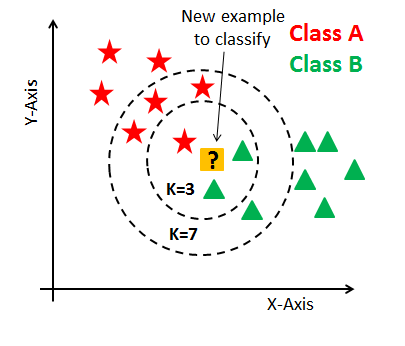


KNN works by looking at the nearest neighbors of something new and deciding what it should be based on what most of those neighbors are. It’s like asking your friends for advice on something new by seeing what they think.

-----
-----

**Imagine you have a bunch of objects that are already sorted into groups. For example, let's say you have a bunch of fruits, and each fruit is labeled as either an apple, an orange, or a banana.**

Now, you find a new fruit, and you want to figure out what it is. You can use the KNN algorithm to help you. Here’s how:

**Look Around**: You check out the closest fruits to this new one. Let's say you decide to look at the 3 closest fruits (this number is called "K" in KNN).

**Count the Neighbors**: You see that 2 of these nearby fruits are apples, and 1 is a banana.

**Make a Decision**: Since most of the nearby fruits are apples, you decide that your new fruit is also likely to be an apple.

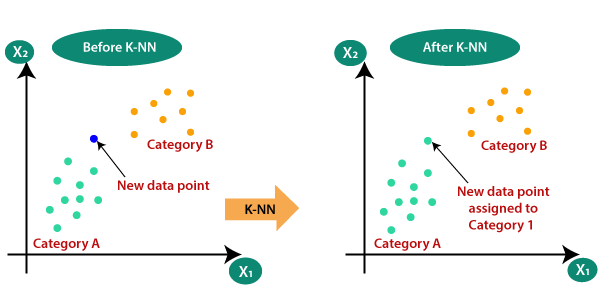

# Use Cases of KNN

**Classification:**

Spam Detection: Classify emails as spam or not based on text similarity.

Customer Segmentation: Group customers into categories based on purchase behavior.

Image Recognition: Classify objects in images based on pixel intensity.

**Regression:**

House Price Prediction: Predict the price of a house based on features like area, number of rooms, etc.

Stock Market Prediction: Estimate future stock prices using historical data.

Recommendation Systems:Suggest products to users by finding similar users based on purchase history.

# Advantages of KNN

1) Simplicity:

Easy to implement and understand.

No complex training process is required.

2) Versatility:

Can be used for both classification and regression problems.

3) Adaptability:

Performs well with non-linear data without the need for explicit modeling.

4)No Training Phase:

Training is essentially storing the data, which makes KNN faster to set up compared to models requiring parameter optimization.

# Disadvantages of KNN

1) Computationally Expensive:

Prediction can be slow, especially for large datasets, as the algorithm computes the distance for every data point.

2) Memory-Intensive:

Requires storing the entire dataset, which can be infeasible for large datasets.

3) Choice of K:

Determining the optimal value of K can be challenging. Small K can lead to noise sensitivity, while large K can oversimplify predictions.

4) Feature Scaling:

Sensitive to the scale of features; proper normalization or standardization is required.

5) Imbalanced Data:

Struggles with imbalanced datasets as the majority class can dominate predictions.

# Problem Statement

---



---




The objective of this case study is to analyze the relationship between symptoms and diseases in order to accurately diagnose a person's condition. With various symptoms such as headache, joint pain, and cough, it is crucial to determine the underlying disease, as it can range from mild to severe. This study highlights the significance of identifying specific symptoms and their corresponding diseases to improve diagnostic accuracy and facilitate appropriate medical treatment

# About The Data

---



---


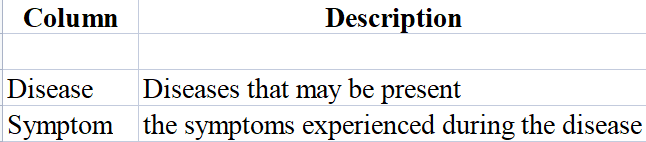

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("disease.csv")
#https://drive.google.com/file/d/1cd4Lm8wbD8kTzQMiktPNFgUzm35XhB4E/view?usp=sharing
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.to_string())

                                      Disease                     Symptom_1                     Symptom_2                      Symptom_3                      Symptom_4                        Symptom_5                        Symptom_6                      Symptom_7                  Symptom_8                  Symptom_9                    Symptom_10                       Symptom_11                       Symptom_12              Symptom_13            Symptom_14        Symptom_15        Symptom_16    Symptom_17
0                            Fungal infection                       itching                     skin_rash           nodal_skin_eruptions            dischromic _patches                              NaN                              NaN                            NaN                        NaN                        NaN                           NaN                              NaN                              NaN                     NaN                   NaN               NaN           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


**We can find in which column how much percent of null values are there**

In [ ]:
df.isnull().sum()/len(df)*100

,0
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854
Symptom_7,53.902439
Symptom_8,60.487805
Symptom_9,65.609756


In [ ]:
drop_list=["Symptom_17","Symptom_16","Symptom_15","Symptom_14","Symptom_13","Symptom_12"]

In [ ]:
df.drop(columns=drop_list,inplace=True)
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in df.columns:
  df[i].fillna("None",inplace=True)

<ipython-input-213-03b3cd55a6c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna("None",inplace=True)


In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,None,None
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,None,None,None,None,None
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,None,None,None,None,None,None,None
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,None,None,None,None,None,None,None
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,None,None,None,None,None


In [ ]:
df["Disease"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
df["Disease"].nunique()

41

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in df.columns:
  df[i]=le.fit_transform(df[i])

In [ ]:
print(df.to_string())

      Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11
0          15         33         35         35         11         38         32         26         21         22          21          18
1          15         24         27         18         50         38         32         26         21         22          21          18
2          15         33         27         18         50         38         32         26         21         22          21          18
3          15         33         35         18         50         38         32         26         21         22          21          18
4          15         33         35         35         50         38         32         26         21         22          21          18
5          15         24         27         18         50         38         32         26         21         22          21          18
6          15         33         27      

# Model Building

In [ ]:
x=df.drop(columns=["Disease"],axis=1)
y=df["Disease"]

In [ ]:
x

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,33,35,35,11,38,32,26,21,22,21,18
1,24,27,18,50,38,32,26,21,22,21,18
2,33,27,18,50,38,32,26,21,22,21,18
3,33,35,18,50,38,32,26,21,22,21,18
4,33,35,35,50,38,32,26,21,22,21,18
...,...,...,...,...,...,...,...,...,...,...,...
4915,28,17,33,38,22,29,26,21,22,21,18
4916,24,31,3,35,38,32,26,21,22,21,18
4917,4,4,22,7,38,32,26,21,22,21,18
4918,24,20,42,36,27,15,26,21,22,21,18


In [ ]:
y

,Disease
0,15
1,15
2,15
3,15
4,15
...,...
4915,0
4916,2
4917,38
4918,35


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
'''
Start with a few different values for K (like 3, 5, 7, etc.) and test them. The goal is to find the value that gives the best accuracy
on your data.
Often, K=5 is a good starting point because it balances the influence of nearby data points without being too sensitive to noise.


Odd vs. Even:

If your classification problem has two classes (e.g., yes or no), it’s often better to choose an odd number
for K (like 3, 5, or 7) to avoid ties in voting. If K is even, there could be an equal number of neighbors from both classes,
making it harder to classify the new data point.

'''

'\nStart with a few different values for K (like 3, 5, 7, etc.) and test them. The goal is to find the value that gives the best accuracy\non your data.\nOften, K=5 is a good starting point because it balances the influence of nearby data points without being too sensitive to noise.\n\n\nOdd vs. Even:\n\nIf your classification problem has two classes (e.g., yes or no), it’s often better to choose an odd number\nfor K (like 3, 5, or 7) to avoid ties in voting. If K is even, there could be an equal number of neighbors from both classes,\nmaking it harder to classify the new data point.\n\n'

In [ ]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [ ]:
# Accuracy score of Training data
y_pred=knn.predict(x_train)
from sklearn.metrics import *
accuracy_score(y_pred , y_train)*100

99.89837398373984

In [ ]:
# Accuracy score of Testing data
y_pred=knn.predict(x_test)
from sklearn.metrics import *
accuracy_score(y_pred , y_test)*100

99.1869918699187

**Make some prediction by passing new synpothoms**

In [ ]:
print(knn.predict([[133,	227,	18	,5440	,38	,32	,26	,21,	2442,	21	,18]]) )

[32]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Question:

**You are given a dataset containing customer demographics and purchasing behavior.**

Dataset Link : https://drive.google.com/file/d/1UnAfQiBUBXVX7BTFH_NfdICmUf90gbuX/view?usp=sharing

1) Handle missing values appropriately.

2) Apply KNN clustering to group customers into 3 clusters based on their similarities.

3) Visualize the clusters using a scatter plot.

4) Interpret the characteristics of each cluster.